In [1]:
!wget https://archive.ics.uci.edu/static/public/53/iris.zip
!unzip iris.zip

--2023-11-26 11:30:29--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2023-11-26 11:30:29 (557 MB/s) - ‘iris.zip’ saved [3738]

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


In [2]:
x = []
y = []

for line in open("iris.data", "r"):
  line = line.strip()#문자열 공백 지우기
  if line != '':
    tokens = line.split(',')# , 를 기준으로 분리
    x.append([float(t) for t in tokens[:4]])# 데이터를 넣기
    y.append(tokens[4])

y_labels = list(set(y))

y = [y_labels.index(i) for i in y]
import numpy as np
x = np.array(x)
y = np.array(y)

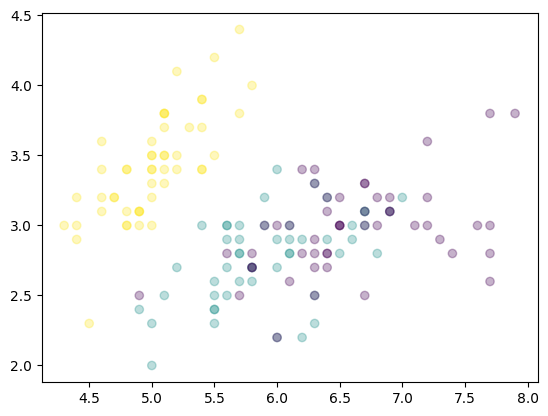

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1], c=y, alpha=0.3)
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
#데이터를 train과 test로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)#test_size = 테스트 케이스의 비율

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#knn
knn = KNeighborsClassifier(n_neighbors=5)# n_neighbors = k
knn.fit(x_train,y_train)

y_train_pred = knn.predict(x_train)#train 데이터 결과값
y_test_pred = knn.predict(x_test)#test 결과값
#실제값과의 유사도
print("train accuracy:", accuracy_score(y_train_pred, y_train))
print("test accuracy:", accuracy_score(y_test_pred, y_test))

train accuracy: 0.9833333333333333
test accuracy: 0.9666666666666667


In [6]:
#최적의 k 찾기
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

scores = []
test_scores = []
k_values = range(1,31)

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, x_train, y_train, cv=10, scoring="accuracy")#cv = n-fold의 n
  scores.append(score.mean())
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  test_scores.append(accuracy_score(y_test, y_pred))


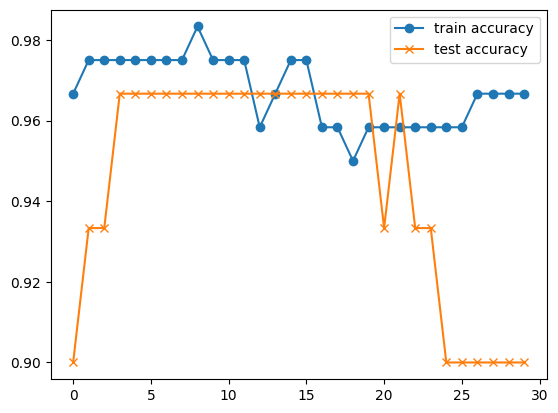

In [7]:
plt.plot(scores, "-o" , label="train accuracy")
plt.plot(test_scores,"-x", label="test accuracy")
plt.legend()
plt.show()